# Projektaufgabe: Deskriptive Statistik und Visualisierungen

Für den Online-Artikel zum Kundenstamm der Bibliothek braucht die Pressestelle einige interessanten Zahlen zum **Thema Alter und Bibliotheksnutzung**. Außerdem möchte sie die Daten in einer Info-Graphik zusammenstellen.

Für eine erste Demo bist Du verantwortlich:

    Berechne 2-3 Statistiken und erstelle 2-3 Visualisierungen basierend auf den Informationen im Datensatz.
    Nutze pandas zur Berechnung der Statistiken und seaborn für die Visualisierungen.

Lade bis spätestens 18.03.24 Deinen Report in Form eines Jupyter Notebooks in der Dateiablage in Moodle hoch.

Website der Bibliothek: https://sfpl.org/

Daten zur Nutzung der **San Francisco Library** (*https://sfpl.org/*) sind auf der Website *https://data.sfgov.org/Culture-and-Recreation/Library-Usage/qzz6-2jup/about_data* verfügbar. 
Dort befindt sich Klarstellungen zu den bereitgestellten Daten, wie z. B. der Menge (436.290 Zeilen), was sie umfassen ('Patron Type Code', 'Patron Type Definition',  'Total Checkouts', 'Total Renewals', 'Age Range', 'Home Library Code', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notification Preference Code', 'Notification Code Definition', 'Provided Email Address', 'Within San Francisco County', 'Year Patron Registered') und um welchen Typ es sich dabei handelt (Zahlen oder Texte).

Die ersten vorgestellten Kategorien (*'Patron Type Code'* und *'Patron Type Definition'*) umfassen die Benutzertypen: 'Staff', 'Welcome', 'Visitor', 'Digital Access Card', 'Juvenile', 'Senior', 'Adult', 'Teen', 'Retired Staff', 'Teacher Card', 'At User Adult', 'At User Senior', 'At User Welcome', 'At User Teen', 'Business', 'Library By Mail', 'At User Juvenile'. Obwohl es sich auf den ersten Blick um relevante Informationen zu handeln scheint, sind sie für unsere Forschung nicht sehr nützlich, da wir nicht wissen, nach welchen Kriterien sie definiert wurden. Daher lassen wir sie für diese Datensynthese beiseite und wir bevorzugen Daten aus der Kategorie 'Age Range'.

Da sie zunächst als nicht relevant erachtet werden, bleiben folgende Parameter ebenfalls unberücksichtigt: 'Home Library Code' und 'Within San Francisco County'. 

Zur Analyse verbleiben: **'Total Checkouts', 'Total Renewals', 'Age Range', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notice Preference Code', 'Notice Preference Definition', 'Provided Email Address' und 'Year Patron Registered'**.

Basierend auf den Informationen zur **'Age Range'** wurden vier Kategorien von Benutzern definiert:
- Jugendliche (von 0 bis 19 Jahre);
- Erwachsene (von 20 bis 59 Jahre); und
- Senioren (ab 60 Jahren).

1. Wie ist die Altersgruppe in der Nutzerpopulation verteilt?

2. Wie sind die Bibliotheksnutzer aufgeteilt?
Es sind 99.549 Jugendliche (von 0 bis 19 Jahre), 267.164 Erwachsene (von 20 bis 59 Jahre) und 68.665 Senioren (ab 60 Jahren) registriert.

3. Wie werden die Benutzer nach Zweigstellen aufgeteilt? Was konzentriert mehr Benutzer?

4. Bibliotheksbenutzer der Zweigstelle 'Main' nach Altersgruppe

5. Welche Benutzer haben in der Hauptbibliothek seit Beginn der Datenerfassung die meisten Bücher ausgeliehen?

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline
sns.set_theme()

In [6]:
df = pd.read_csv("../data/Library_Usage.csv",
    low_memory=False
)

In [7]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Within San Francisco County'],
      dtype='object')

In [8]:
df

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,5,Staff,53,15,NaN,b2,Bayview,Mar,2023.0,z,Email,True,2003,False
1,5,Staff,480,378,NaN,e9,Excelsior,Jun,2023.0,z,Email,True,2003,False
2,5,Staff,70,33,45 to 54 years,n4,Noe Valley,Jan,2023.0,z,Email,True,2011,False
3,5,Staff,3934,2140,NaN,o2,Ocean View,Jul,2023.0,z,Email,True,2003,False
4,5,Staff,1118,1035,NaN,o7,Ortega,Jul,2023.0,z,Email,True,2003,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436285,0,Adult,2,6,35 to 44 years,yjj,Bookmobile,Oct,2022.0,z,Email,True,2020,NaN
436286,2,Teen,3,0,10 to 19 years,yjj,Bookmobile,Nov,2015.0,z,Email,True,2011,NaN
436287,0,Adult,6,0,60 to 64 years,ylw,Bookmobile,Mar,2022.0,z,Email,True,2022,NaN
436288,15,Teacher Card,4,0,35 to 44 years,ylw,Bookmobile,Sep,2020.0,z,Email,True,2019,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 436290 entries, 0 to 436289
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Patron Type Code              436290 non-null  int64  
 1   Patron Type Definition        436290 non-null  object 
 2   Total Checkouts               436290 non-null  int64  
 3   Total Renewals                436290 non-null  int64  
 4   Age Range                     435378 non-null  object 
 5   Home Library Code             436288 non-null  object 
 6   Home Library Definition       436260 non-null  object 
 7   Circulation Active Month      396777 non-null  object 
 8   Circulation Active Year       396777 non-null  float64
 9   Notice Preference Code        393301 non-null  object 
 10  Notice Preference Definition  393301 non-null  object 
 11  Provided Email Address        436290 non-null  bool   
 12  Year Patron Registered        436290 non-nul

In [10]:
df.describe()

,Patron Type Code,Total Checkouts,Total Renewals,Circulation Active Year,Year Patron Registered
count,436290.000000,436290.000000,436290.000000,396777.000000,436290.000000
mean,1.081295,160.294843,78.317546,2022.170698,2015.598327
std,3.383103,537.923680,304.506449,1.358145,6.148953
min,0.000000,0.000000,0.000000,2004.000000,2003.000000
25%,0.000000,0.000000,0.000000,2022.000000,2012.000000
50%,0.000000,7.000000,3.000000,2023.000000,2017.000000
75%,1.000000,78.000000,35.000000,2023.000000,2021.000000
max,104.000000,45380.000000,11921.000000,2023.000000,2023.000000


In [11]:
df_selection = df[['Total Checkouts', 'Total Renewals', 'Age Range', 'Home Library Definition', 'Circulation Active Month', 'Circulation Active Year', 'Notice Preference Code', 'Notice Preference Definition', 'Provided Email Address', 'Year Patron Registered']]

In [12]:
df_selection

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered
0,53,15,NaN,Bayview,Mar,2023.0,z,Email,True,2003
1,480,378,NaN,Excelsior,Jun,2023.0,z,Email,True,2003
2,70,33,45 to 54 years,Noe Valley,Jan,2023.0,z,Email,True,2011
3,3934,2140,NaN,Ocean View,Jul,2023.0,z,Email,True,2003
4,1118,1035,NaN,Ortega,Jul,2023.0,z,Email,True,2003
...,...,...,...,...,...,...,...,...,...,...
436285,2,6,35 to 44 years,Bookmobile,Oct,2022.0,z,Email,True,2020
436286,3,0,10 to 19 years,Bookmobile,Nov,2015.0,z,Email,True,2011
436287,6,0,60 to 64 years,Bookmobile,Mar,2022.0,z,Email,True,2022
436288,4,0,35 to 44 years,Bookmobile,Sep,2020.0,z,Email,True,2019


In [13]:
df1 = df_selection.sort_values(by='Age Range')

In [14]:
df1

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered
218321,42,22,0 to 9 years,Park,Mar,2023.0,z,Email,True,2022
199611,1,1,0 to 9 years,Parkside,Dec,2022.0,z,Email,True,2022
199601,2,2,0 to 9 years,Parkside,Jul,2023.0,z,Email,True,2023
358186,5,9,0 to 9 years,North Beach,Dec,2022.0,z,Email,True,2022
358187,6,6,0 to 9 years,North Beach,Oct,2022.0,z,Email,True,2022
...,...,...,...,...,...,...,...,...,...,...
436185,3883,2906,NaN,Main,Jul,2023.0,z,Email,True,2003
436196,270,430,NaN,Main,Jun,2023.0,z,Email,True,2017
436211,2933,3322,NaN,Main,Jul,2023.0,z,Email,True,2003
436225,664,510,NaN,Main,Jul,2023.0,z,Email,True,2003


In [15]:
df1['Age Range'].unique()

array(['0 to 9 years', '10 to 19 years', '20 to 24 years',
       '25 to 34 years', '35 to 44 years', '45 to 54 years',
       '55 to 59 years', '60 to 64 years', '65 to 74 years',
       '75 years and over', nan], dtype=object)

In [16]:
df1['Age Range'].value_counts()

Age Range
25 to 34 years       92669
35 to 44 years       81719
10 to 19 years       66857
45 to 54 years       48319
0 to 9 years         32692
65 to 74 years       31714
20 to 24 years       25381
75 years and over    19297
55 to 59 years       19076
60 to 64 years       17654
Name: count, dtype: int64

## 1. Wie ist die Altersgruppe in der Nutzerpopulation verteilt?

Text(0.5, 1.0, 'Nutzerpopulation nach Altersgruppen')

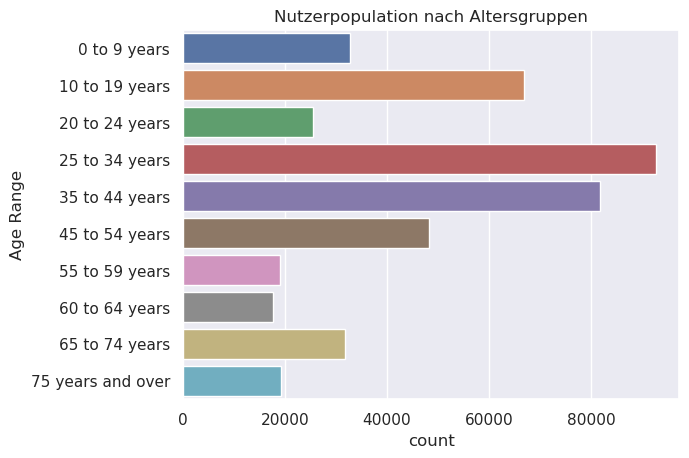

In [17]:
sns.countplot(y='Age Range', data=df1).set_title("Nutzerpopulation nach Altersgruppen")

In [18]:
# categorias de usuários

juvenile=df_selection.loc[
    (df['Age Range'] == "0 to 9 years") | 
    (df['Age Range'] == "10 to 19 years")]

adult=df_selection.loc[
    (df['Age Range'] == "20 to 24 years") | 
    (df['Age Range'] == "25 to 34 years") | 
    (df['Age Range'] == "35 to 44 years") | 
    (df['Age Range'] == "45 to 54 years") |
    (df['Age Range'] == "55 to 59 years")]

senior=df_selection.loc[
    (df['Age Range'] == "60 to 64 years") | 
    (df['Age Range'] == "65 to 74 years") | 
    (df['Age Range'] == "75 years and over")]

## 2. Wie sind die Bibliotheksnutzer aufgeteilt?

In [19]:
# Número de usuários por categoria

print('# 1. Wie sind die Bibliotheksnutzer aufgeteilt? ' 
      'Es sind ' + str(len(juvenile)) + ' Jugendliche (von 0 bis 19 Jahre), ' + str(len(adult)) + ' Erwachsene (von 20 bis 59 Jahre) und ' + str(len(senior)) + ' Senioren (ab 60 Jahren)' ' registriert.' )

# 1. Wie sind die Bibliotheksnutzer aufgeteilt? Es sind 99549 Jugendliche (von 0 bis 19 Jahre), 267164 Erwachsene (von 20 bis 59 Jahre) und 68665 Senioren (ab 60 Jahren) registriert.


In [20]:
df1["Home Library Definition"].unique()

array(['Park', 'Parkside', 'North Beach', 'Main', 'Ortega', 'Merced',
       'Marina', 'Ingleside', 'Excelsior', 'Eureka Valley', 'Glen Park',
       'Golden Gate Valley', 'Ocean View', 'Noe Valley', 'Mission Bay',
       'Mission', 'Sunset', 'Potrero', 'Richmond', 'West Portal',
       'Bookmobile', 'Bernal', 'Bayview', 'Anza', 'Chinatown', 'Presidio',
       'Portola', 'Visitacion Valley', 'Western Addition', nan],
      dtype=object)

## 3. Wie werden die Benutzer nach Zweigen aufgeteilt? Was konzentriert mehr Benutzer?

In [21]:
df1['Home Library Definition'].value_counts()

Home Library Definition
Main                  142000
Richmond               20656
Mission                18463
Mission Bay            16169
Ortega                 15442
Sunset                 14303
Excelsior              13656
Eureka Valley          12449
Chinatown              12376
Park                   11495
Marina                 11359
Bernal                 10976
West Portal            10842
Presidio               10378
North Beach            10350
Noe Valley             10311
Merced                 10248
Potrero                 9974
Parkside                8953
Anza                    8821
Western Addition        8804
Ingleside               8803
Glen Park               8229
Golden Gate Valley      6895
Portola                 6815
Bayview                 6518
Visitacion Valley       5440
Ocean View              3488
Bookmobile              2047
Name: count, dtype: int64

In [22]:
main=df1.loc[(df1['Home Library Definition'] == "Main")]

In [23]:
main = main.dropna()
main

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered
44664,38,15,0 to 9 years,Main,Jul,2023.0,z,Email,True,2022
44679,22,41,0 to 9 years,Main,May,2023.0,z,Email,True,2019
44701,156,134,0 to 9 years,Main,Jul,2023.0,z,Email,True,2016
44600,10,9,0 to 9 years,Main,Jun,2023.0,z,Email,True,2021
44608,2,6,0 to 9 years,Main,Jan,2022.0,z,Email,True,2021
...,...,...,...,...,...,...,...,...,...,...
44988,10,2,75 years and over,Main,Mar,2023.0,z,Email,True,2012
414266,0,0,75 years and over,Main,Jul,2023.0,z,Email,True,2019
44908,168,73,75 years and over,Main,May,2023.0,z,Email,True,2003
44913,0,0,75 years and over,Main,Jul,2023.0,z,Email,True,2020


In [87]:
main['Circulation Active Year'].unique()

array([2023., 2022., 2020., 2021., 2019., 2017., 2016., 2018., 2015.,
       2013., 2014., 2012., 2010., 2009., 2008., 2011., 2006., 2007.,
       2005., 2004.])

In [24]:
main.value_counts()

Total Checkouts  Total Renewals  Age Range          Home Library Definition  Circulation Active Month  Circulation Active Year  Notice Preference Code  Notice Preference Definition  Provided Email Address  Year Patron Registered
0                0               25 to 34 years     Main                     Jul                       2023.0                   z                       Email                         True                    2022                      638
                                                                                                                                                                                                              2019                      457
                                 35 to 44 years     Main                     Jul                       2023.0                   z                       Email                         True                    2019                      455
                                 25 to 34 years     Main       

## 4. Bibliotheksbenutzer der Zweigstelle 'Main' nach Altersgruppe

/home/rafaela/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


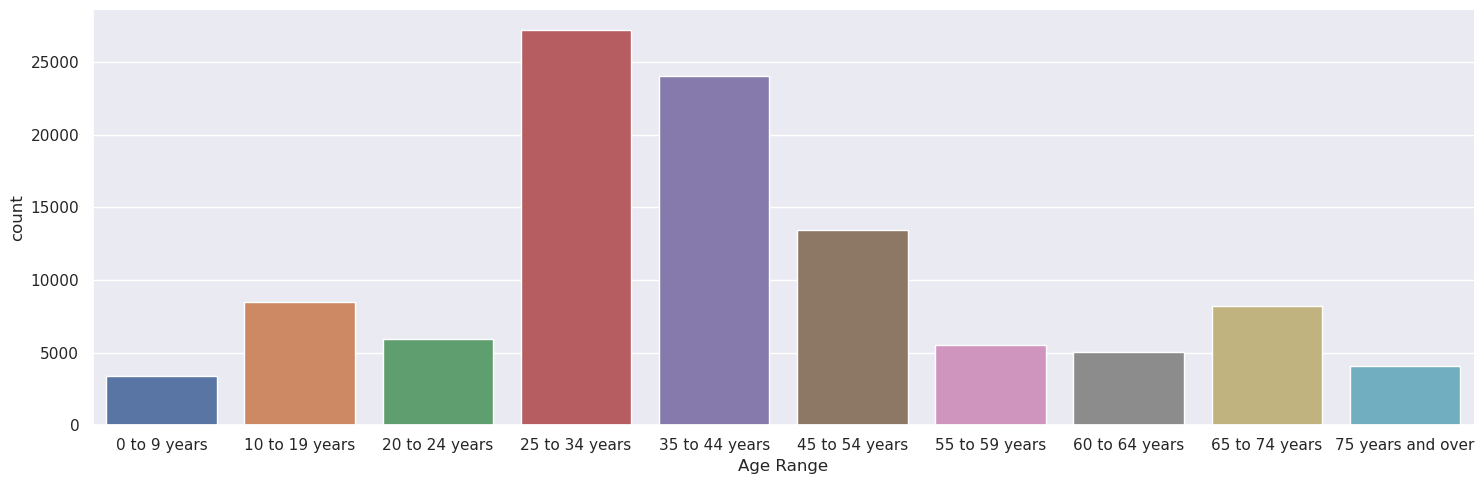

In [25]:
per_age =['0 to 9 years', '10 to 19 years', '20 to 24 years', '25 to 34 years', '35 to 44 years', '45 to 54 years', '55 to 59 years', '60 to 64 years', '65 to 74 years', '75 years and over']
sns.catplot(x='Age Range', kind="count", data=main, aspect=3)

In [26]:
pd.crosstab(
    main['Home Library Definition'],
    main['Age Range'],
    margins=True, normalize=0
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over
Home Library Definition,,,,,,,,,,
Main,0.032244,0.080824,0.05606,0.258315,0.227798,0.127582,0.052139,0.048143,0.078024,0.03887
All,0.032244,0.080824,0.05606,0.258315,0.227798,0.127582,0.052139,0.048143,0.078024,0.03887


In [27]:
pd.crosstab(
    main['Home Library Definition'],
    main['Age Range'],
    margins=True
)

Age Range,0 to 9 years,10 to 19 years,20 to 24 years,25 to 34 years,35 to 44 years,45 to 54 years,55 to 59 years,60 to 64 years,65 to 74 years,75 years and over,All
Home Library Definition,,,,,,,,,,,
Main,3397,8515,5906,27214,23999,13441,5493,5072,8220,4095,105352
All,3397,8515,5906,27214,23999,13441,5493,5072,8220,4095,105352


## 5. Welche Benutzer haben in der Hauptbibliothek seit Beginn der Datenerfassung die meisten Bücher ausgeliehen?

In [28]:
df1['Total Checkouts'].info()

<class 'pandas.core.series.Series'>
Index: 436290 entries, 218321 to 436270
Series name: Total Checkouts
Non-Null Count   Dtype
--------------   -----
436290 non-null  int64
dtypes: int64(1)
memory usage: 6.7 MB


In [29]:
main['Circulation Active Year'] = pd.to_numeric(main['Circulation Active Year'], errors='coerce')
main['Membership Duration Years'] = (main['Circulation Active Year'] - main['Year Patron Registered'])+1 
# hier werden der Einfachheit ganze Jahre angenommen
main["Average Checkouts per Year"] =(main['Total Checkouts']/main['Membership Duration Years'])

In [30]:
df_main_checkouts = main.loc[(main['Total Checkouts'] > 11500)]

In [31]:
# 4. Benutzer von 'Main', die meisten Bücher ausgeliehen haben

df_main_checkouts.sort_values(by='Total Checkouts')

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Membership Duration Years,Average Checkouts per Year
31455,11919,20,65 to 74 years,Main,Feb,2023.0,z,Email,True,2008,16.0,744.937500
49348,12095,18,75 years and over,Main,Jul,2023.0,z,Email,True,2003,21.0,575.952381
176948,12644,77,75 years and over,Main,Jul,2023.0,z,Email,True,2003,21.0,602.095238
92888,13440,4152,60 to 64 years,Main,Jul,2023.0,z,Email,True,2003,21.0,640.000000
247701,13850,3424,75 years and over,Main,Jul,2023.0,z,Email,True,2003,21.0,659.523810
127338,13852,2334,65 to 74 years,Main,Jul,2023.0,z,Email,True,2003,21.0,659.619048
434124,17494,948,65 to 74 years,Main,Jul,2023.0,z,Email,True,2003,21.0,833.047619
189918,18385,1362,75 years and over,Main,Jul,2023.0,z,Email,True,2003,21.0,875.476190
341347,18848,408,45 to 54 years,Main,Jul,2023.0,z,Email,True,2003,21.0,897.523810
74783,21890,16,75 years and over,Main,Jan,2023.0,z,Email,True,2005,19.0,1152.105263


/home/rafaela/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


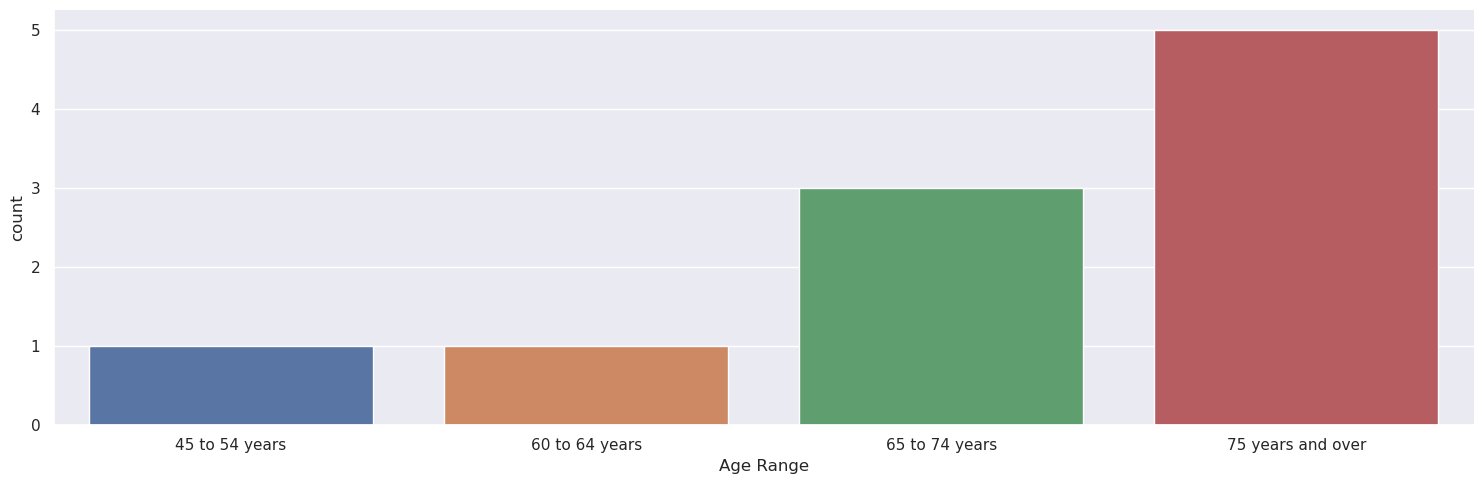

In [84]:
sns.catplot(x='Age Range', kind="count", data=df_main_checkouts, aspect=3)

In [95]:
df1 = df1.sort_values(by='Membership Duration Years')
df1 = df1.dropna()
df1

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Membership Duration Years,Average Checkouts per Year
297534,0,0,25 to 34 years,Marina,Feb,2022.0,z,Email,True,2022,1.0,0.000000
281458,3,0,0 to 9 years,Sunset,Jun,2023.0,z,Email,True,2023,1.0,3.000000
200655,29,36,25 to 34 years,Parkside,Jul,2023.0,z,Email,True,2023,1.0,29.000000
260850,0,0,25 to 34 years,Richmond,Aug,2022.0,z,Email,True,2022,1.0,0.000000
275756,0,0,0 to 9 years,Parkside,Jul,2023.0,z,Email,True,2023,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
200326,1037,205,20 to 24 years,Parkside,Jul,2023.0,z,Email,True,2003,21.0,49.380952
81263,229,320,75 years and over,Marina,Jul,2023.0,z,Email,True,2003,21.0,10.904762
241471,22,29,25 to 34 years,Richmond,May,2023.0,z,Email,True,2003,21.0,1.047619
215341,677,24,45 to 54 years,Park,May,2023.0,z,Email,True,2003,21.0,32.238095


/home/rafaela/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
/home/rafaela/anaconda3/lib/python3.8/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


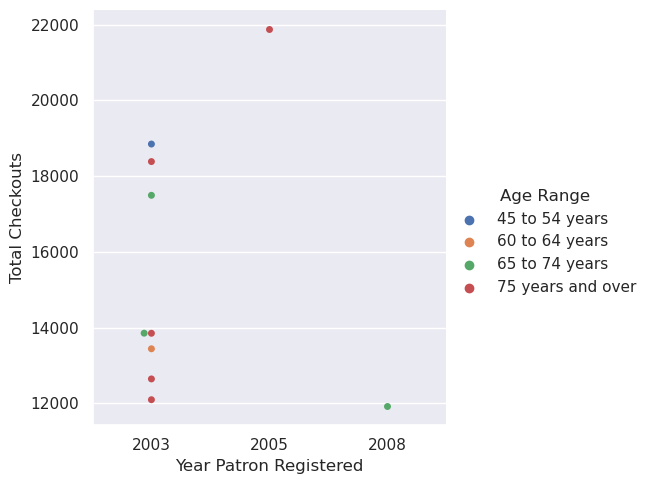

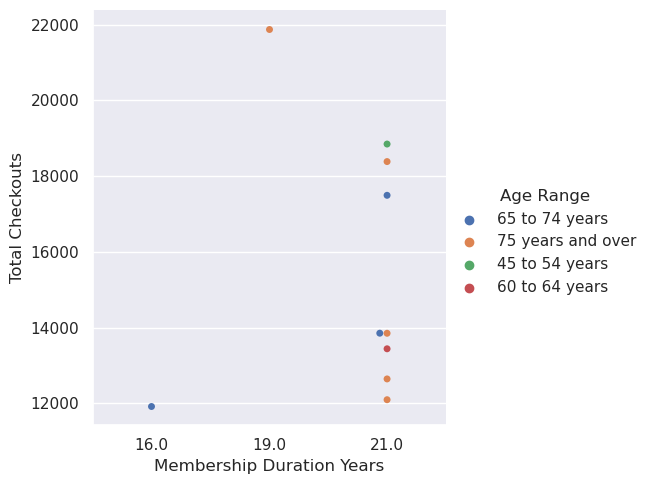

In [83]:
sns.catplot(data=df_main_checkouts, kind="swarm", x="Year Patron Registered", y="Total Checkouts", hue="Age Range")
sns.catplot(data=df_main_checkouts, kind="swarm", x="Membership Duration Years", y="Total Checkouts", hue="Age Range") 

In [96]:
df1['Circulation Active Year'] = pd.to_numeric(df1['Circulation Active Year'], errors='coerce')
df1['Membership Duration Years'] = (df1['Circulation Active Year'] - df1['Year Patron Registered'])+1 
# hier werden der Einfachheit ganze Jahre angenommen
df1["Average Checkouts per Year"] =(df1['Total Checkouts']/df1['Membership Duration Years'])
df1

,Total Checkouts,Total Renewals,Age Range,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Membership Duration Years,Average Checkouts per Year
297534,0,0,25 to 34 years,Marina,Feb,2022.0,z,Email,True,2022,1.0,0.000000
281458,3,0,0 to 9 years,Sunset,Jun,2023.0,z,Email,True,2023,1.0,3.000000
200655,29,36,25 to 34 years,Parkside,Jul,2023.0,z,Email,True,2023,1.0,29.000000
260850,0,0,25 to 34 years,Richmond,Aug,2022.0,z,Email,True,2022,1.0,0.000000
275756,0,0,0 to 9 years,Parkside,Jul,2023.0,z,Email,True,2023,1.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...
200326,1037,205,20 to 24 years,Parkside,Jul,2023.0,z,Email,True,2003,21.0,49.380952
81263,229,320,75 years and over,Marina,Jul,2023.0,z,Email,True,2003,21.0,10.904762
241471,22,29,25 to 34 years,Richmond,May,2023.0,z,Email,True,2003,21.0,1.047619
215341,677,24,45 to 54 years,Park,May,2023.0,z,Email,True,2003,21.0,32.238095


## 6. Anzahl der Benutzer pro Zweigstelle entsprechend der Anzahl der Nutzungsjahre der Bibliothek

In [35]:
pd.crosstab(df1['Home Library Definition'], df1['Membership Duration Years'])

Membership Duration Years,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,12.0,13.0,14.0,15.0,16.0,17.0,18.0,19.0,20.0,21.0
Home Library Definition,,,,,,,,,,,,,,,,,,,,,
Anza,1070,864,485,411,658,534,460,378,349,320,...,255,246,181,191,253,166,158,179,224,878
Bayview,796,468,274,289,510,576,573,369,349,319,...,166,158,166,125,115,88,72,97,112,248
Bernal,1140,1010,604,567,890,810,751,513,463,422,...,328,328,334,204,167,156,153,159,239,858
Bookmobile,258,290,112,112,193,161,175,70,71,43,...,39,27,31,18,11,16,18,27,25,78
Chinatown,1055,886,451,486,906,860,788,620,604,491,...,424,407,372,348,278,265,303,348,438,1121
Eureka Valley,1348,1262,770,699,1124,826,687,493,482,430,...,351,327,298,270,210,179,184,206,244,1150
Excelsior,1217,816,557,646,899,1005,908,640,612,557,...,502,447,372,383,322,247,244,288,329,1049
Glen Park,638,498,298,273,473,495,509,418,423,333,...,296,295,330,301,280,218,167,216,255,986
Golden Gate Valley,973,888,439,363,608,491,408,288,257,218,...,153,126,106,111,129,58,81,87,105,446


In [36]:
df1['Membership Duration Years'].describe()

count    396777.000000
mean          8.098683
std           6.250777
min           1.000000
25%           3.000000
50%           6.000000
75%          12.000000
max          21.000000
Name: Membership Duration Years, dtype: float64

<Axes: xlabel='Membership Duration Years', ylabel='Home Library Definition'>

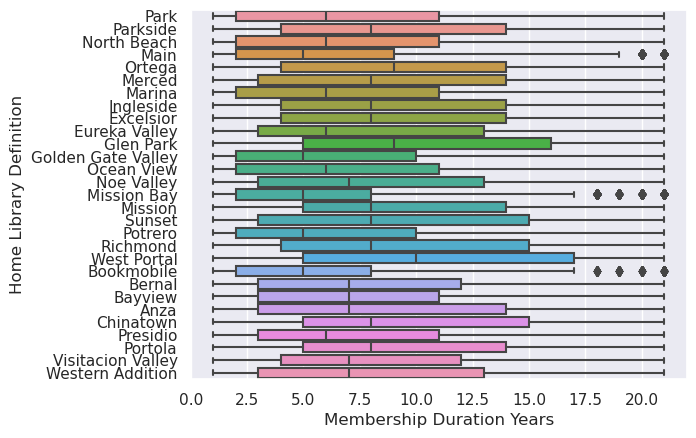

In [38]:
sns.boxplot(x = "Membership Duration Years", y = 'Home Library Definition', data = df1)

In [39]:
# [AL] nette Fragestellung und Visualisierung dazu. Durch die vielen verschiedenen Bibliotheks-
# standorten ist die Darstellung natürlich etwas "voll". Evtl. ließe sich das in verschiedene
# Grafiken aufteilen?
# Was genau liest man bei den Punkten, wieso haben nur Main, Mission Bay, Bookmobile und None Punkte, 
# die anderen nicht?